In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(7)

%matplotlib inline

In [2]:
iris_data = load_iris() # load the iris dataset

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # convert data into a single column

print(x.shape, y_.shape)

(150, 4) (150, 1)


In [3]:
# one hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
print(y.shape)
print(y_[0])
print(y[0])

(150, 3)
[0]
[1. 0. 0.]


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
# split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [7]:
# build the model
model = Sequential()

model.add(Dense(10, input_shape=(4, ), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# adam optimizer with learning rate of 0.001
optimizer = Adam(lr = 0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# train the model
history = model.fit(train_x, train_y, verbose=0, batch_size=32, epochs=1000, validation_split=0.1)

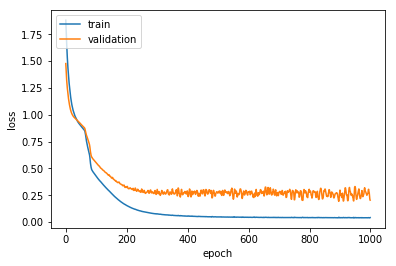

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# evaluation
loss, accuracy = model.evaluate(test_x, test_y, verbose=0)
print('Accuracy = {:.2f}'.format(accuracy))

Accuracy = 1.00
